<a href="https://colab.research.google.com/github/ibrahimabdulj/deep-learning-project/blob/main/Deeplearningprj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
#creatin a model class that inherits nn.module
class Model(nn.Module):
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super() .__init__() #innitiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

# picking a rondm seed for randomization
torch.manual_seed(41)
model = Model()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)
my_df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
#change last column from strings to integers

my_df ['species']= my_df['species'].replace('setosa', 0.0)
my_df ['species']= my_df['species'].replace('versicolor', 1.0)
my_df ['species']= my_df['species'].replace('virginica', 2.0)
my_df

/tmp/ipython-input-3685669610.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df ['species']= my_df['species'].replace('virginica', 2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [6]:
# SET x and y and convert to numpy arrays
x = my_df.drop('species', axis=1).values
y = my_df['species'].values


In [7]:
from sklearn.model_selection import train_test_split
#Train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)

In [8]:
#convert x features to float tensors
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

In [9]:
#covert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)
#

In [10]:
# set the criterion of the model to measure the error, which is how far of the predictions are from the data
criterion = nn.CrossEntropyLoss()

# Choose an Optimizer lr= lerning rate (if our error doesnt go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [11]:
# Train our model
# Epoch? (one run thre all thetraining data in our )
epochs = 200
losses = []
for i in range (epochs):
  y_pred = model.forward(x_train) #get the predicted result

  #Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) #predicted value vs y_train

  #keep Track of our losses

  losses.append(loss.detach().numpy())

  #Print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  #Do some back propagation take the error rate of forward and feed it back
  #thru the nextwork yo find the weight
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1251550912857056
Epoch: 10 and loss: 1.0096259117126465
Epoch: 20 and loss: 0.8157405853271484
Epoch: 30 and loss: 0.585706353187561
Epoch: 40 and loss: 0.3999636471271515
Epoch: 50 and loss: 0.26768800616264343
Epoch: 60 and loss: 0.17942361533641815
Epoch: 70 and loss: 0.12151690572500229
Epoch: 80 and loss: 0.0860118493437767
Epoch: 90 and loss: 0.06520850956439972
Epoch: 100 and loss: 0.05286576226353645
Epoch: 110 and loss: 0.04508381709456444
Epoch: 120 and loss: 0.03979949280619621
Epoch: 130 and loss: 0.035970740020275116
Epoch: 140 and loss: 0.03293721750378609
Epoch: 150 and loss: 0.03041938506066799
Epoch: 160 and loss: 0.026795217767357826
Epoch: 170 and loss: 0.02338254824280739
Epoch: 180 and loss: 0.020531881600618362
Epoch: 190 and loss: 0.018495969474315643


Text(0.5, 0, 'epoch')

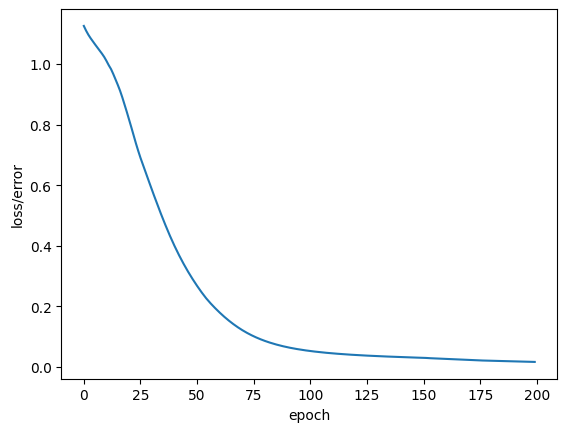

In [12]:
# Graph it out
plt.plot(range(epochs), losses )
plt.ylabel('loss/error')
plt.xlabel('epoch')

In [13]:
#Evaluate model on Test Data set (validate model on test set)
with torch.no_grad(): #basically turn off back propagation
  y_eval = model.forward(x_test) #x_test are features from our test set, y_eval will be
  loss = criterion(y_eval, y_test) #Find the loss or error



In [14]:
loss

tensor(0.1816)

In [17]:
correct = 0
with torch.no_grad():
  for i, data in enumerate (x_test):
    y_val = model.forward(data)

    if y_test [i] == 0:
      x = 'Setosa'
    elif y_test [i] == 1:
      x = 'versicolor'
    else:
      x= 'virginia'


    #will tell us what type of flower class our network thinks it is
    print(f'{i+1},) {str(y_val)} \t {x} \t {y_val.argmax().item()}')
    #To check if its correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'we got {correct} correct')

1,) tensor([-7.1090,  3.8945,  9.0009]) 	 virginia 	 2
2,) tensor([-9.7568,  1.8037, 15.7614]) 	 virginia 	 2
3,) tensor([-10.9675,   2.8777,  16.6036]) 	 virginia 	 2
4,) tensor([-3.7644,  8.0391, -1.2691]) 	 versicolor 	 1
5,) tensor([-9.0332,  3.5238, 12.6383]) 	 virginia 	 2
6,) tensor([-1.8244,  8.6935, -5.3425]) 	 versicolor 	 1
7,) tensor([-6.8734,  4.9821,  7.3703]) 	 virginia 	 2
8,) tensor([-3.6489,  8.2259, -1.6743]) 	 versicolor 	 1
9,) tensor([-7.9281,  4.2588,  9.9576]) 	 virginia 	 2
10,) tensor([-10.4298,   1.8741,  16.8126]) 	 virginia 	 2
11,) tensor([-6.4726,  5.1594,  6.5086]) 	 virginia 	 2
12,) tensor([ 12.4419,   2.4570, -21.9049]) 	 Setosa 	 0
13,) tensor([ 11.4217,   2.2044, -19.9136]) 	 Setosa 	 0
14,) tensor([-0.1940,  6.9626, -6.0924]) 	 versicolor 	 1
15,) tensor([ 10.1568,   3.3059, -19.1088]) 	 Setosa 	 0
16,) tensor([-5.9767,  5.7989,  4.9675]) 	 virginia 	 1
17,) tensor([ 11.2091,   2.5254, -19.9652]) 	 Setosa 	 0
18,) tensor([-6.8898,  4.2924,  8.1948]